# Skills Test One

## Problem 1.
Use dynamic programming to write a program to make change using as few coins as possible.  Suppose that you've got an infinite supply of coins in several denominations.  Suppose further that an integer from 1 to 99 cents represents the amount you must represent with coins.  Suppose that the coin denominations are flexible, but always include a coin worth one cent.  
1a.  Show an equation relating the best value at stage "m" to a maximization over earlier stages.    
1b.  Write a python program to solve the recursion.  



In [3]:
import numpy as np

In [8]:
def change(target_value,coin_denominations=[1,5,10,25,50]):
    """Return change to reach the target value given the coin denominations,
    assuming you have unlimited values of each coin."""
    
    ## initialize a matrix to record your change at different points
    c_l = len(coin_denominations)
    t_l = target_value
    matrix = np.zeros((c_l,t_l))
    
    
    for coin_v,coin in enumerate(coin_denominations): ## go through each denomination
        for interval_v,interval in enumerate(range(1,target_value+1)):
#             print(interval,'interval')
            if coin_v ==0: ### first row initialize as the number of coins
                matrix[coin_v,interval_v]=interval
            elif coin < interval: # coins smaller than the target value
                matrix[coin_v,interval_v]=min(matrix[coin_v-1,interval_v], \
                                                 int(interval/coin) + matrix[coin_v-1,interval%coin-1])
            elif interval%coin == 0: ## coins go in evenly to your target value
                matrix[coin_v,interval_v]=interval/coin
            elif coin > interval: #coin greater than your interval
                matrix[coin_v,interval_v] = matrix[coin_v-1,interval_v]

    #print(matrix)
    return min(matrix[:,target_value-1])

In [9]:
change(90)

4.0

In [10]:
assert change(90)==4
assert change(75)==2

## Problem 2.  
Use k-nearest neighbors to build a machine learning model to predict wine quality scores from chemical measurements of the wine.  Use the white wine data set from UCI data repository.  Here's a link:  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv .  Download the csv file and store it in the same folder as this notebook so the notebook will have access to the file easily.  Or you can download the file over the internet - whichever is easier for you.  You can read the website description or look through the file to figure out how the data are formatted in the file - (usually delimited text file).  Read it into a numpy data structure in order to be able to manipulate easily.  Then do the following:  

#### Step 1.  Download the data
The download instructions are given directly above.

#### Step 2.  Scale the data
Use the package - sklearn.preprocessing.scale to scale the attributes in this set to standard form (zero mean and unit variance).  The documentation shows you how to use the function.  http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html and http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler .  The default settings on the scale function will work fine.  Be sure to do the scaling along the columns of the data matrix - not along the rows.  

#### Step 3.  Divide the data
-Divide the data set into two subsets for training and test.  
-Use 35% of the data for testing and 65% for training.  (Notice that we're not doing a separate validations set.)

#### Step 4.  Build models and 
-Use the sklearn KNN regression package to train and test.
http://scikit-learn.org/stable/modules/neighbors.html   
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor   

-Train and test KNN models over a range of k values and plot the root mean squared error on the training data and on the test data.  Plot both of these quantities on the same figure.  

-Pick the value of k that gives the best performance (lowest value of error on the test data).   

-Report best value of k and the corresponding value of the rmse.  



In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
wine_df = pd.read_csv('winequality-white.csv',delimiter=';')

In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
#standardize the data
x_values = wine_df.iloc[:,:-1]
y_values = wine_df.iloc[:,-1:]

In [16]:
scaler = StandardScaler()

In [17]:
x_values = scaler.fit_transform(x_values)
x_values

array([[  1.72096961e-01,  -8.17699008e-02,   2.13280202e-01, ...,
         -1.24692128e+00,  -3.49184257e-01,  -1.39315246e+00],
       [ -6.57501128e-01,   2.15895632e-01,   4.80011213e-02, ...,
          7.40028640e-01,   1.34184656e-03,  -8.24275678e-01],
       [  1.47575110e+00,   1.74519434e-02,   5.43838363e-01, ...,
          4.75101984e-01,  -4.36815783e-01,  -3.36667007e-01],
       ..., 
       [ -4.20473102e-01,  -3.79435433e-01,  -1.19159198e+00, ...,
         -1.31315295e+00,  -2.61552731e-01,  -9.05543789e-01],
       [ -1.60561323e+00,   1.16673788e-01,  -2.82557040e-01, ...,
          1.00495530e+00,  -9.62604939e-01,   1.85757201e+00],
       [ -1.01304317e+00,  -6.77100966e-01,   3.78559282e-01, ...,
          4.75101984e-01,  -1.48839409e+00,   1.04489089e+00]])

In [18]:
#Split the data into testing and training
#X_train, X_test, y_train, y_test = train_test_split(
#...     X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x_values,y_values,test_size=.35)

0.713383153629  Min RMSE for test data for k = 9 
9  Best k for test data
0.346815467592  R^2 for test data


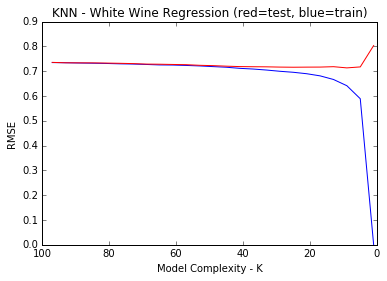

In [26]:
# KNN regression
rmse_train =[]
rmse_test = []
r_2_score_test = []
k_values = [k for k in range(1,100,4)]

for k in range(1,100,4):
    model = KNeighborsRegressor(k)
    model.fit(X_train,y_train) # fit it
    rmse_train.append(np.linalg.norm(y_train - model.predict(X_train))/sqrt(len(y_train))) #rmse
    rmse_test.append(np.linalg.norm(y_test - model.predict(X_test))/sqrt(len(y_test)))
    r_2_score_test.append(model.score(X_test,y_test))

#plot it
plt.plot([k for k in range(1,100,4)],rmse_train,color='blue')
plt.plot([k for k in range(1,100,4)],rmse_test,color='red')
plt.gca().invert_xaxis()
plt.xlabel('Model Complexity - K')
plt.ylabel('RMSE')
plt.title('KNN - White Wine Regression (red=test, blue=train)')

#Print min rmse and best k 
print(min(rmse_test), ' Min RMSE for test data for k = {} '.format(k_values[np.argmin(rmse_test)],))
print(k_values[np.argmin(rmse_test)], ' Best k for test data')
print(r_2_score_test[np.argmin(rmse_test)], ' R^2 for test data')


## Problem 3. 
Use penalized regression to build a model to predict wine quality as in the last problem.  

#### Step 1.  Instantiate member of ElasticNetCV class
-Use the sklearn.linear_model.ElasticNetCV package in sklearn.  You can find the package documentation here:  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html .  Most of the default settings for the class will work fine on this problem.  The only ones you'll want to change are: 

l1_ratio=0.5 -    You'll want to build several models with different values of l1_ratio (between say 0.01 and 1).   
normalize=False - This should be set to True   
cv=None, -        Try 5 or 10   
n_jobs=1. -        This integer determines how many cores will be use.  Setting to -1 uses all the available core.   
 
#### Step 2.  Train an ElasticNet penalized model and plot it's performance 
-Plot MSE.  Instantiate a class member of the ElasticNetCV class and then use the fit() member function (supplying training data and lables that you extracted in Problem 2).  The fit() function will perform cross-validation on a multitude of models, and calculate mean square error across the models.  In the package documentation you'll see the attribute mse_path_ .  That shows a two dimensional numpy array filled with mean square error across the test portion for each fold and model complexity (alpha value).  Plot the paths for each of the folds (columns in the mse_path_ matrix).  

#### Step 3.  Produce model coefficients for best performing model
-Extract coefficients.  The member variable coef_ has a real number coefficient for each of the attributes.  

#### Step 4.  Use penalized regression to determine variable importance.  
-Determine variable importance.  
Go through this whole sequence again, but before starting normalize the feature matrix before fitting a model to it.  Use the scale() function as you used in Problem 2.  Instantiate an ElasticNetCV object as in the first portion of this problem.  Then fit the model to the scaled versions of the training data.  Extract the coefficients and order them from the one with the largest absolute value to the smallest.  Order the names of attributes associated from largest absolute coefficient value to smallest.   


In [61]:
from  sklearn.linear_model import ElasticNetCV
from sklearn.grid_search import GridSearchCV

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[[ 0.75687793  0.72845621  0.79881439  0.87206391  0.86830976  0.74390496
   0.68423679  0.81587532  0.78768625  0.81331466]
 [ 0.75687673  0.72845507  0.79881321  0.87206253  0.86830859  0.74390402
   0.68423583  0.81587461  0.78768504  0.81331354]
 [ 0.75687543  0.72845385  0.79881195  0.87206104  0.86830734  0.74390302
   0.6842348   0.81587384  0.78768373  0.81331234]
 [ 0.75687405  0.72845254  0.79881059  0.87205944  0.86830599  0.74390193
   0.6842337   0.81587302  0.78768233  0.81331105]
 [ 0.75687256  0.72845114  0.79880914  0.87205773  0.86830455  0.74390078
   0.68423251  0.81587214  0.78768083  0.81330966]
 [ 0.75687096  0.72844957  0.79880699  0.8720559   0.86830273  0.74389929
   0.68423095  0.81587085  0.78767907  0.81330818]
 [ 0.75686841  0.72844715  0.79880454  0.87205312  0.86830047  0.74389729
   0.68422895  0.8158694   0.78767662  0.81330578]
 [ 0.75686565  0.72844456  0.79880192  0.87205001  0.86829805  0.74389516
   0.68422681  0.81586784  0.787674    0.81330314]


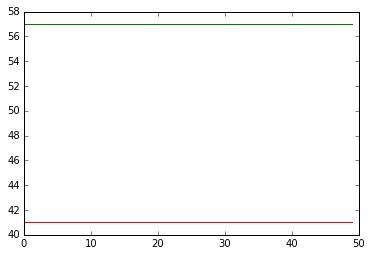

In [69]:
# create different values for elastic net of the L1 ratio
#####default values
# (l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False,
#precompute='auto', max_iter=1000, tol=0.0001,
#cv=None, copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=None, selection='cyclic')[source]¶

# ##new x and y values that are not scaled
x_values = wine_df.iloc[:,:-1]
y_values = wine_df.iloc[:,-1:]

#Split the data
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(x_values,y_values,test_size=.35)


#Change to numpy arrays
X_train_en = np.array(X_train_en)
X_test_en = np.array(X_test_en)

#reshape y values
y_train_en = np.array(y_train_en).reshape((len(y_train_en)))
y_test_en = np.array(y_test_en).reshape((len(y_test_en)))

#Record RMSE for each model
rmse_train = []
rmse_test = []
coefficients = []
alpha = []
lambdas = []
r_2_test= []

#loop through different l1 parameters

for l in np.linspace(.001,1,50):
    ENetModel = ElasticNetCV(l1_ratio=l, normalize=True,cv=10,n_jobs=-1)
    
    ENetModel.fit(X_train_en,y_train_en)
    
    #Append the results of this model
    lambdas.append(l)
    
    #
    print(ENetModel.mse_path_)
    
    rmse_train.append(np.linalg.norm(y_train_en - model.predict(X_train_en))/sqrt(len(y_train_en)) )
    rmse_test.append(np.linalg.norm(y_test_en - model.predict(X_test_en))/sqrt(len(y_test_en)) )
    alpha.append(ENetModel.alpha_)
    coefficients.append([ENetModel.coef_])
    
    
    
    
#print(coefficients)
plt.plot(rmse_train,color='green')
plt.plot(rmse_test,color='red')


In [67]:
print(lambdas)

[0.001, 0.021387755102040818, 0.041775510204081635, 0.062163265306122456, 0.08255102040816327, 0.10293877551020408, 0.12332653061224491, 0.14371428571428571, 0.16410204081632654, 0.18448979591836737, 0.20487755102040817, 0.22526530612244899, 0.24565306122448982, 0.26604081632653065, 0.28642857142857142, 0.30681632653061225, 0.32720408163265308, 0.3475918367346939, 0.36797959183673473, 0.3883673469387755, 0.40875510204081633, 0.42914285714285716, 0.44953061224489799, 0.46991836734693881, 0.49030612244897964, 0.51069387755102047, 0.5310816326530613, 0.55146938775510201, 0.57185714285714284, 0.59224489795918367, 0.6126326530612245, 0.63302040816326532, 0.65340816326530615, 0.67379591836734698, 0.69418367346938781, 0.71457142857142864, 0.73495918367346946, 0.75534693877551029, 0.77573469387755101, 0.79612244897959183, 0.81651020408163266, 0.83689795918367349, 0.85728571428571432, 0.87767346938775515, 0.89806122448979597, 0.9184489795918368, 0.93883673469387763, 0.95922448979591846, 0.97961